## Forces Shaping CRE: Technological Innovation and Disruption in Commercial Real Estate

### Spring 2021

### Professor Timothy H. Savage, Ph.D. CRE

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


#### [Who I am](https://www.sps.nyu.edu/homepage/academics/faculty-directory/20319-timothy-h-savage.html):
* Clinicial Assistant Professor at the NYU Schack Institute of Real Estate
* Faculty Director of the CREFC Center for Commercial Real Estate Finance
* Distinquished Fellow of the NAIOP Research Foundation
* Former Senior Managing Economist and Principal Data Scientist of CBRE Econometric Advisors
* Former visiting scholar at the Center for Urban Science & Progress at the NYU Tandon School of Engineering

## The Main Themes of This *Big Ideas* Course
1. The U.S. economy **was not** on sound footing prior to the arrival of COVID-19 in January 2020.
2. U.S. commercial real estate faced technological disruption **before** COVID-19.
3. **Future-proofing** our industry against accelerated change.   

## Course Syllabus Review

## The U.S. Economy and CRE
1. Some empirical regularities of the U.S. economy.
2. The yield curve as a barometer of market expectations of growth.
3. Federal Reserve intervention in shadow banking.
4. COVID-19 is an accelerant?

### Some empirical regularities

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

Text(0, 0.5, '%')

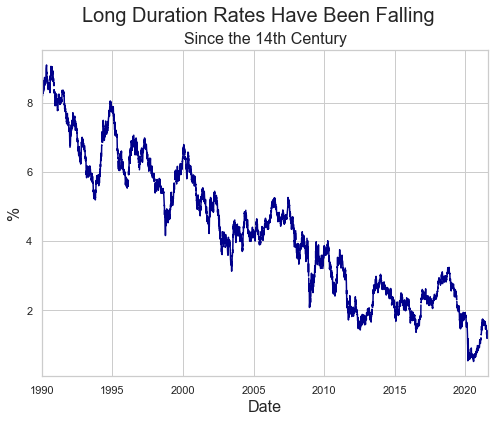

In [3]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Have Been Falling', fontsize=20)
plt.title('Since the 14th Century', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)



Text(0, 0.5, '%')

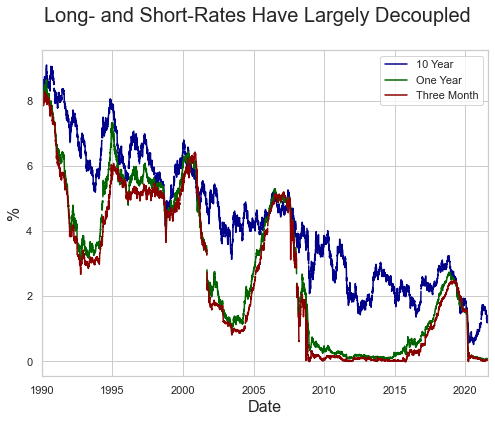

In [4]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
one_year.plot(c='darkgreen', label='One Year')
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

In [5]:
cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

Text(0, 0.5, '%')

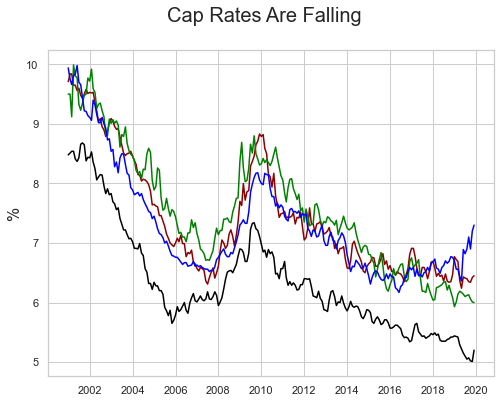

In [6]:
plt.figure(figsize = (8, 6))
plt.suptitle("Cap Rates Are Falling", fontsize=20)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.ylabel('%', fontsize=16)

### The yield curve as a barometer

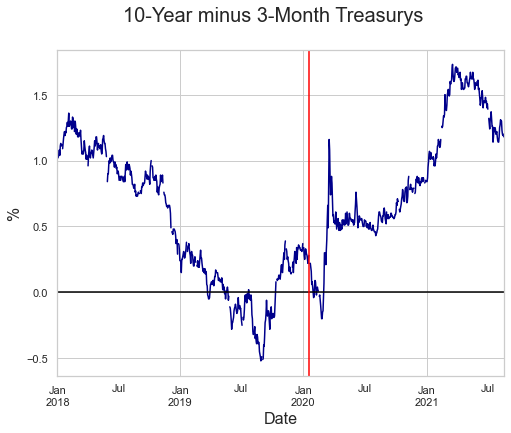

In [7]:
yield_curve = fred.get_series("T10Y3M", observation_start='2018-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('10-Year minus 3-Month Treasurys', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2020, 1, 19), color="red")

### Federal Reserve intervention

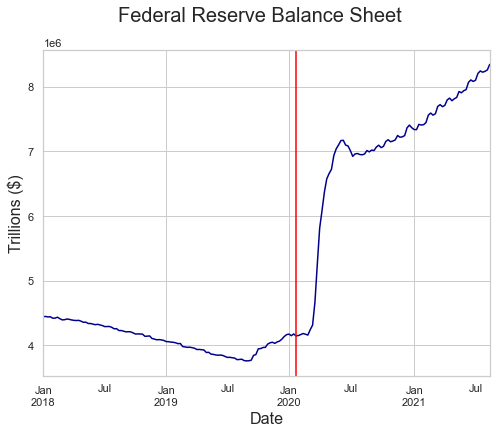

In [8]:
balance_sheet = fred.get_series("WALCL", observation_start='2018-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Balance Sheet', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Trillions ($)', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 19), color="red")


### Healthy economies *do not*
* Have negative yield curves (see Professor Campbell Harvey).
* Require Fed intervention in overnight lending markets (see Global Financial Crisis).



### This occurred before COVID-19 entered the lexicon.
### Forward-looking equity markets as antennae.

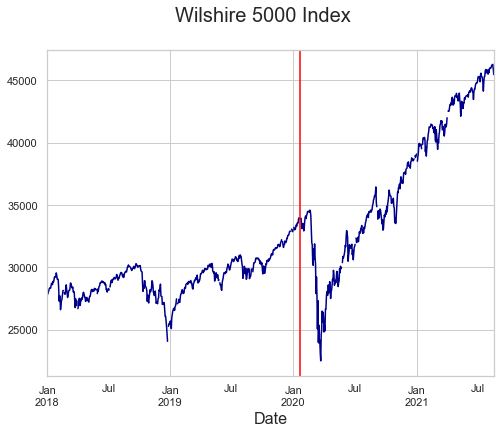

In [9]:
wilshire = fred.get_series("WILL5000PR", observation_start='2018-01-01')
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Wilshire 5000 Index', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 19), color="red")


## CRE Was Faced with Tech Disruption Before COVID-19
* Aggolomeration economics driving **global urbanization** and **density**.
* E-commerce driving **distributional efficiency** of goods.
* Co-working driving **value of optionality** in space markets.

## COVID-19 is an accelerant?
* Data and data science 
* Brokerage
* Hospitality and retail
* PropTech
* Whether the landscape has changed permanently

## Week 1 Panel: How Are Data and Data Science Disrupting Commercial Real Estate?
* Consider a function of data science: 
    * To use data to explore conjectures about how the world works in order to make *probabilistic predictions* about the future.
* Consider Ben Bernanke's claim of a *global savings glut*.
    * This is a conjecture about the relationship between short- and long-run interest rates.
    * Bernanke's conjecture states that the *Expectations Theory* of interest rates is breaking down.
    * This can be examined using data science.

Text(0, 0.5, '%')

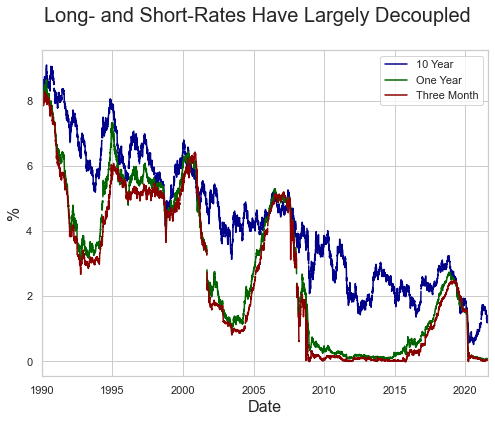

In [10]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
one_year.plot(c='darkgreen', label='One Year')
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

## Consider data availability in CRE
1. Accuracy
2. Granularity
3. Timeliness

## Week 2: How Is Tech Disrupting Brokerage?
* Traditional role of CRE brokerage:
    * To act as a market maker between tenants and landlords
        * *b $\cdot$ 6* $\approx$ location$^3$
        * Tenant rep and landlord rep
        * Requires detail understanding of local CRE markets: **accurate, granular and timely data**        

## Week 2: How Is Tech Disrupting Brokerage?

* Roles expanded into advising clients on property and asset acquisition, dispositions and deal structure (sale and lease back).
    * Capital market advisory
    * Financing sources
    * Related services such as space maintenance

## Week 2: How Is Tech Disrupting Brokerage?
* [CBRE](https://www.cbre.us)
    * Largest vertically-integrated CRE services firm in the world
    * [Market cap](https://www.marketwatch.com/investing/stock/cbre?mod=quote_search) of ~26 billion USD, but $\beta \approx$ 1.3 
    * Space market coverage in the U.S.
        * ~4 billion sqft of office
        * ~15 billion sqft of industrial
        * ~8 billion sqft of retail
        * ~16 million MF units        

### Time Path for Cap Rates (Based on My Research)
1. 100 bps increase in 10-year **increases** cap rates by ~44.5 bps
2. 10% increase in Fed's balance sheet **decreases** cap rates by ~2.6 bps
3. Increases in inflation expectations **decrease** cap rates 
4. Increases in spreads **pass nearly one-to-one** to cap rates

### Net Effect?
* Other than retail and hospitality, cap rates are *not likely to change or will continue to compress slightly*
* Wall of capital: *ample dry powder*
* Real estate remains an attractive asset *given its risk/return trade-offs*

In [11]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime as dt  
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import warnings
warnings.simplefilter('ignore')
#import fix_yahoo_finance as yf
import yfinance as yf

Populating the interactive namespace from numpy and matplotlib


## Week 3: How Is Tech Disrupting Hospitality and Retail?
* Do we have a measure of CRE valuations?



* Some indicative measures.

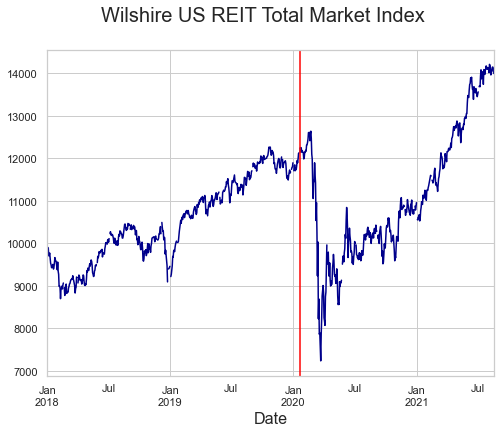

In [12]:
reit = fred.get_series("WILLREITIND", observation_start='2018-01-01')
reit.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Wilshire US REIT Total Market Index', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 19), color="red")


[*********************100%***********************]  1 of 1 completed


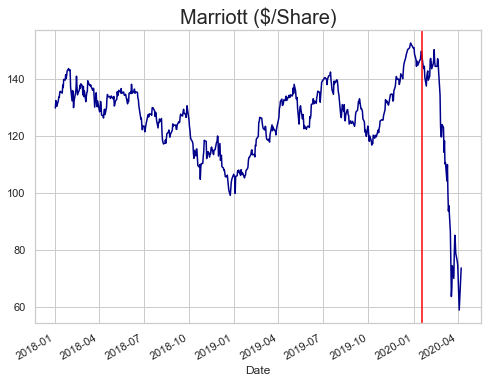

In [13]:
start, end = "2018-01-01", "2020-04-08"
hotel = yf.download('MAR', start=start, end=end)
hotel = hotel['Adj Close']
plt.figure(figsize=(8, 6))
hotel.plot(color='darkblue')
plt.title('Marriott ($/Share)', fontsize=20)
plt.axvline(dt.datetime(2020, 1, 19), color="red")

[*********************100%***********************]  1 of 1 completed


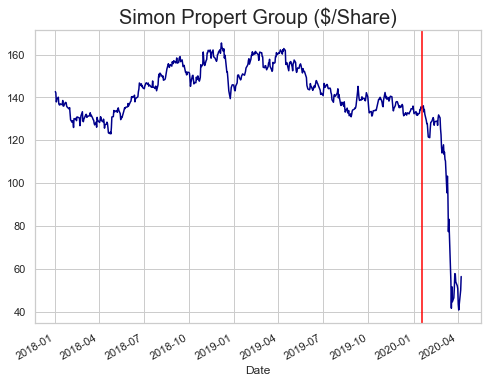

In [14]:
start, end = "2018-01-01", "2020-04-08"
retail = yf.download('SPG', start=start, end=end)
retail = retail['Adj Close']
plt.figure(figsize=(8, 6))
retail.plot(color='darkblue')
plt.title('Simon Propert Group ($/Share)', fontsize=20)
plt.axvline(dt.datetime(2020, 1, 19), color="red")

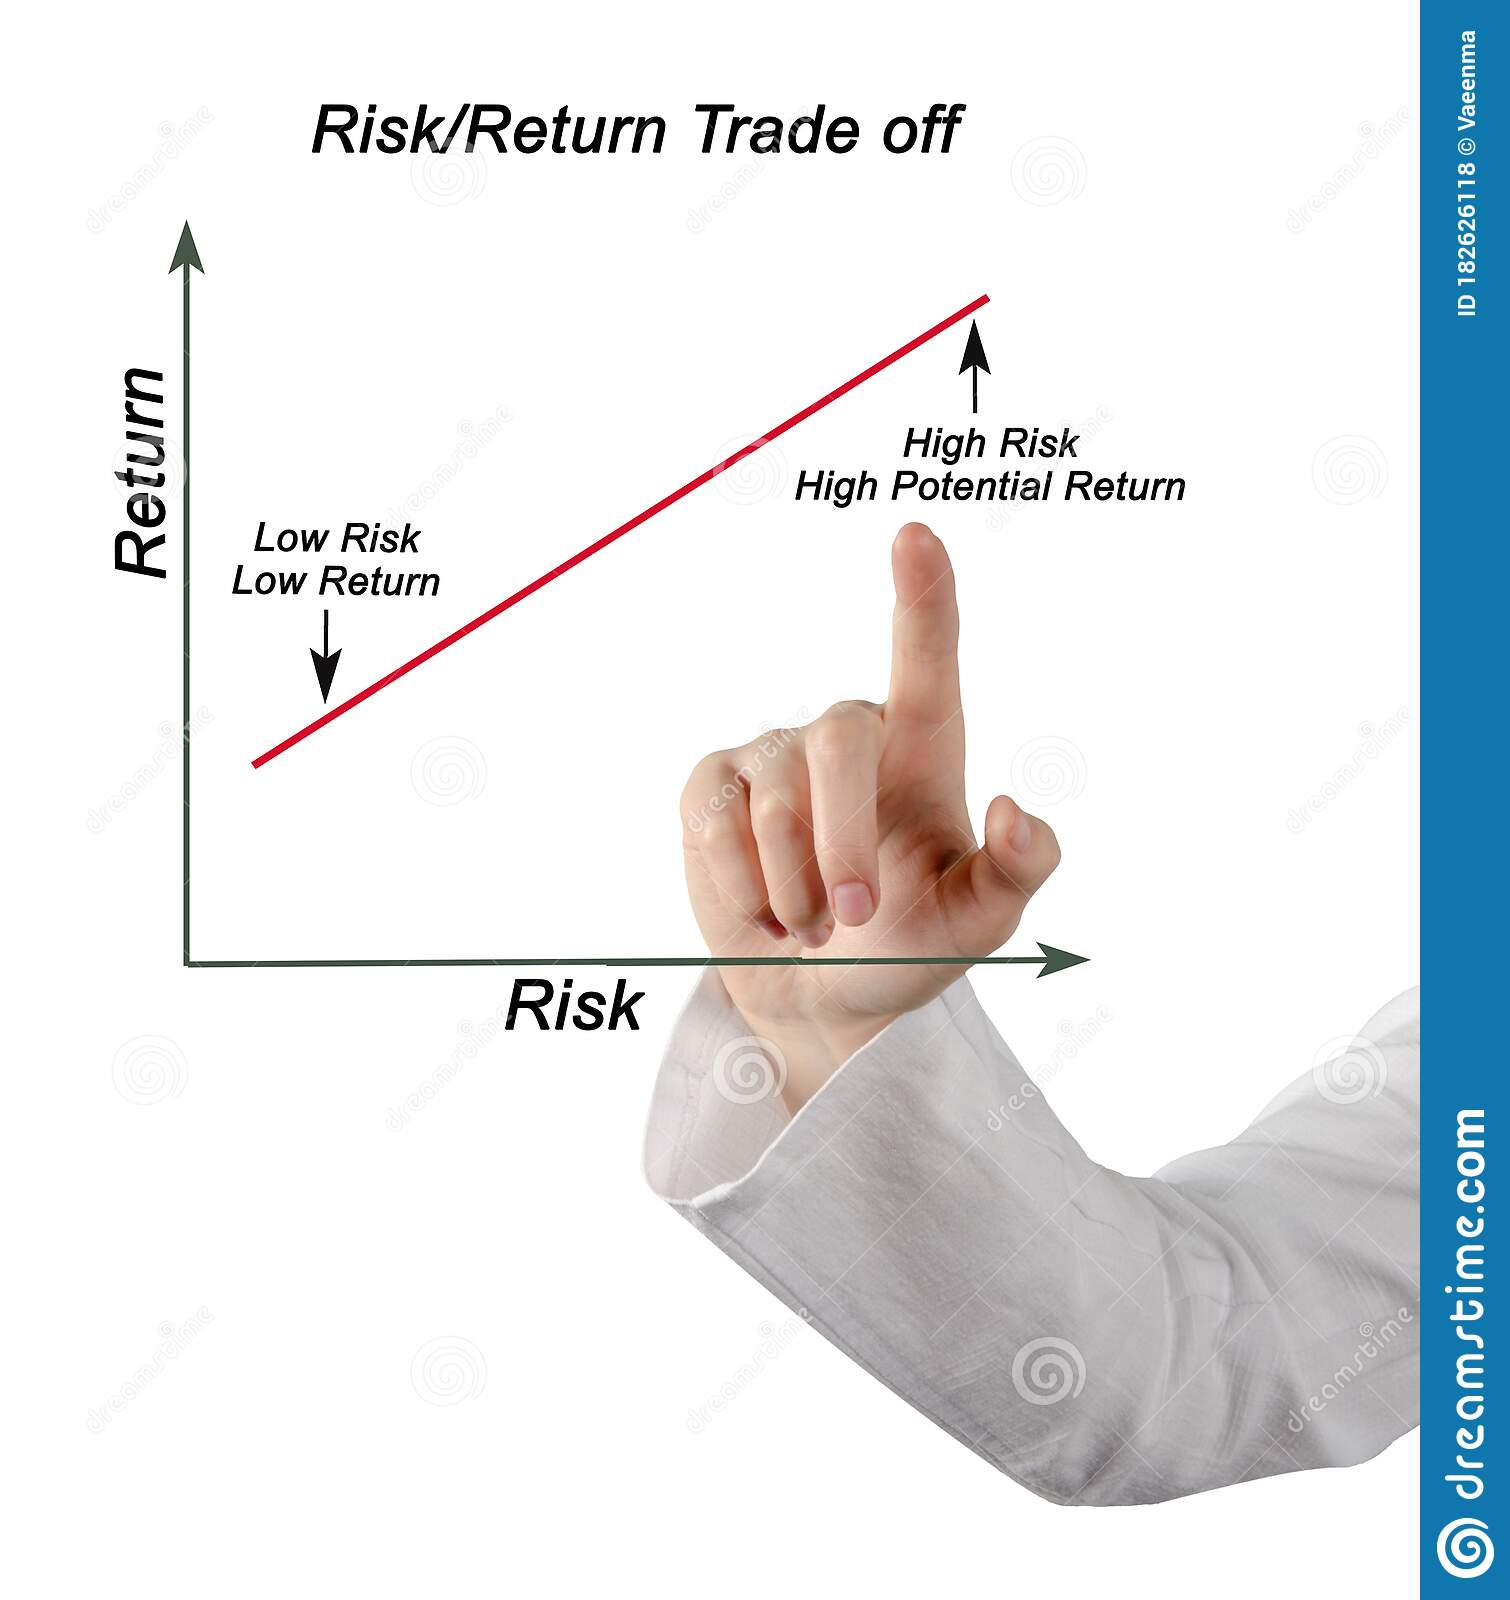

In [15]:
url = 'https://thumbs.dreamstime.com/z/graph-risk-return-trade-off-182626118.jpg'
Image(url, width=400, height=400)

## Hospitality and Retail
* **Basic reality** 
    * Hospitality and retail have been CRE assets with higher **potential return** and **higher risk**.



* Why?

### Hospitality
* Hospitality can price **in real time** to clear markets.
    * **Average daily rates** and **revenue per available room**
    * Potential to control **variable costs**
    * Ability to exploit scale and diffentiation



* As a result, early innovators of:
    * Reservation systems
    * Rewards programs
    * Generating sticky business travelers

* Not surprising that **tech** and **hospitality** combined to create **AirBNB**.

### Hospitality: Old Boat Ferry, Cambridgeshire, UK
* Mentioned in the [*Domesday Book*](https://en.wikipedia.org/wiki/Domesday_Book)
* Served alcohol for ~1500 years

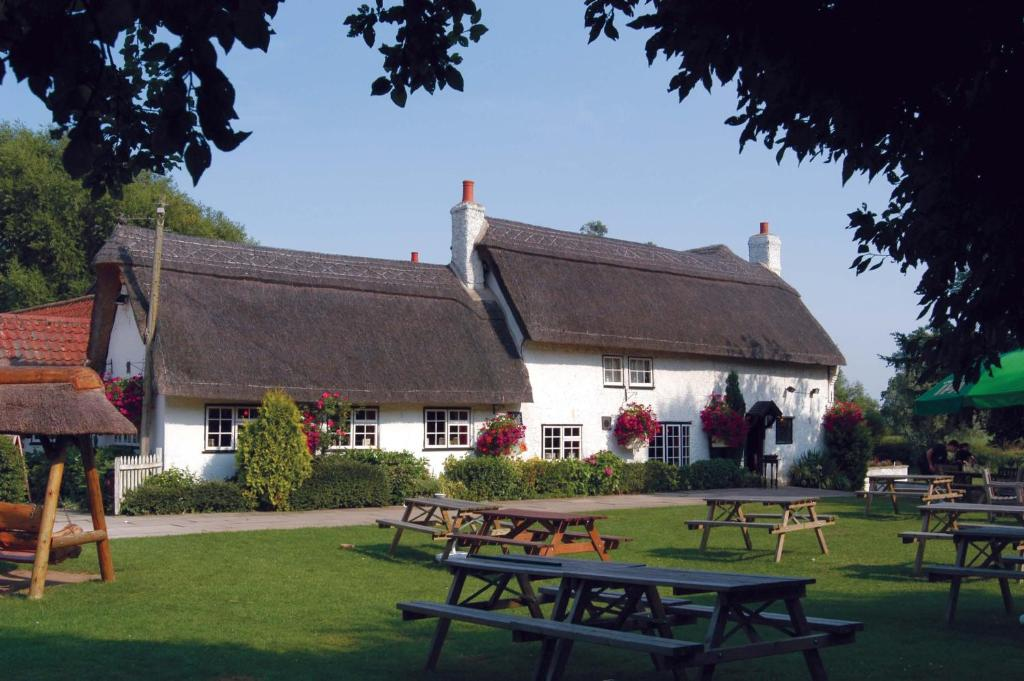

In [16]:
url = 'https://cf.bstatic.com/images/hotel/max1024x768/261/26112567.jpg'
Image(url, width=600, height=600)

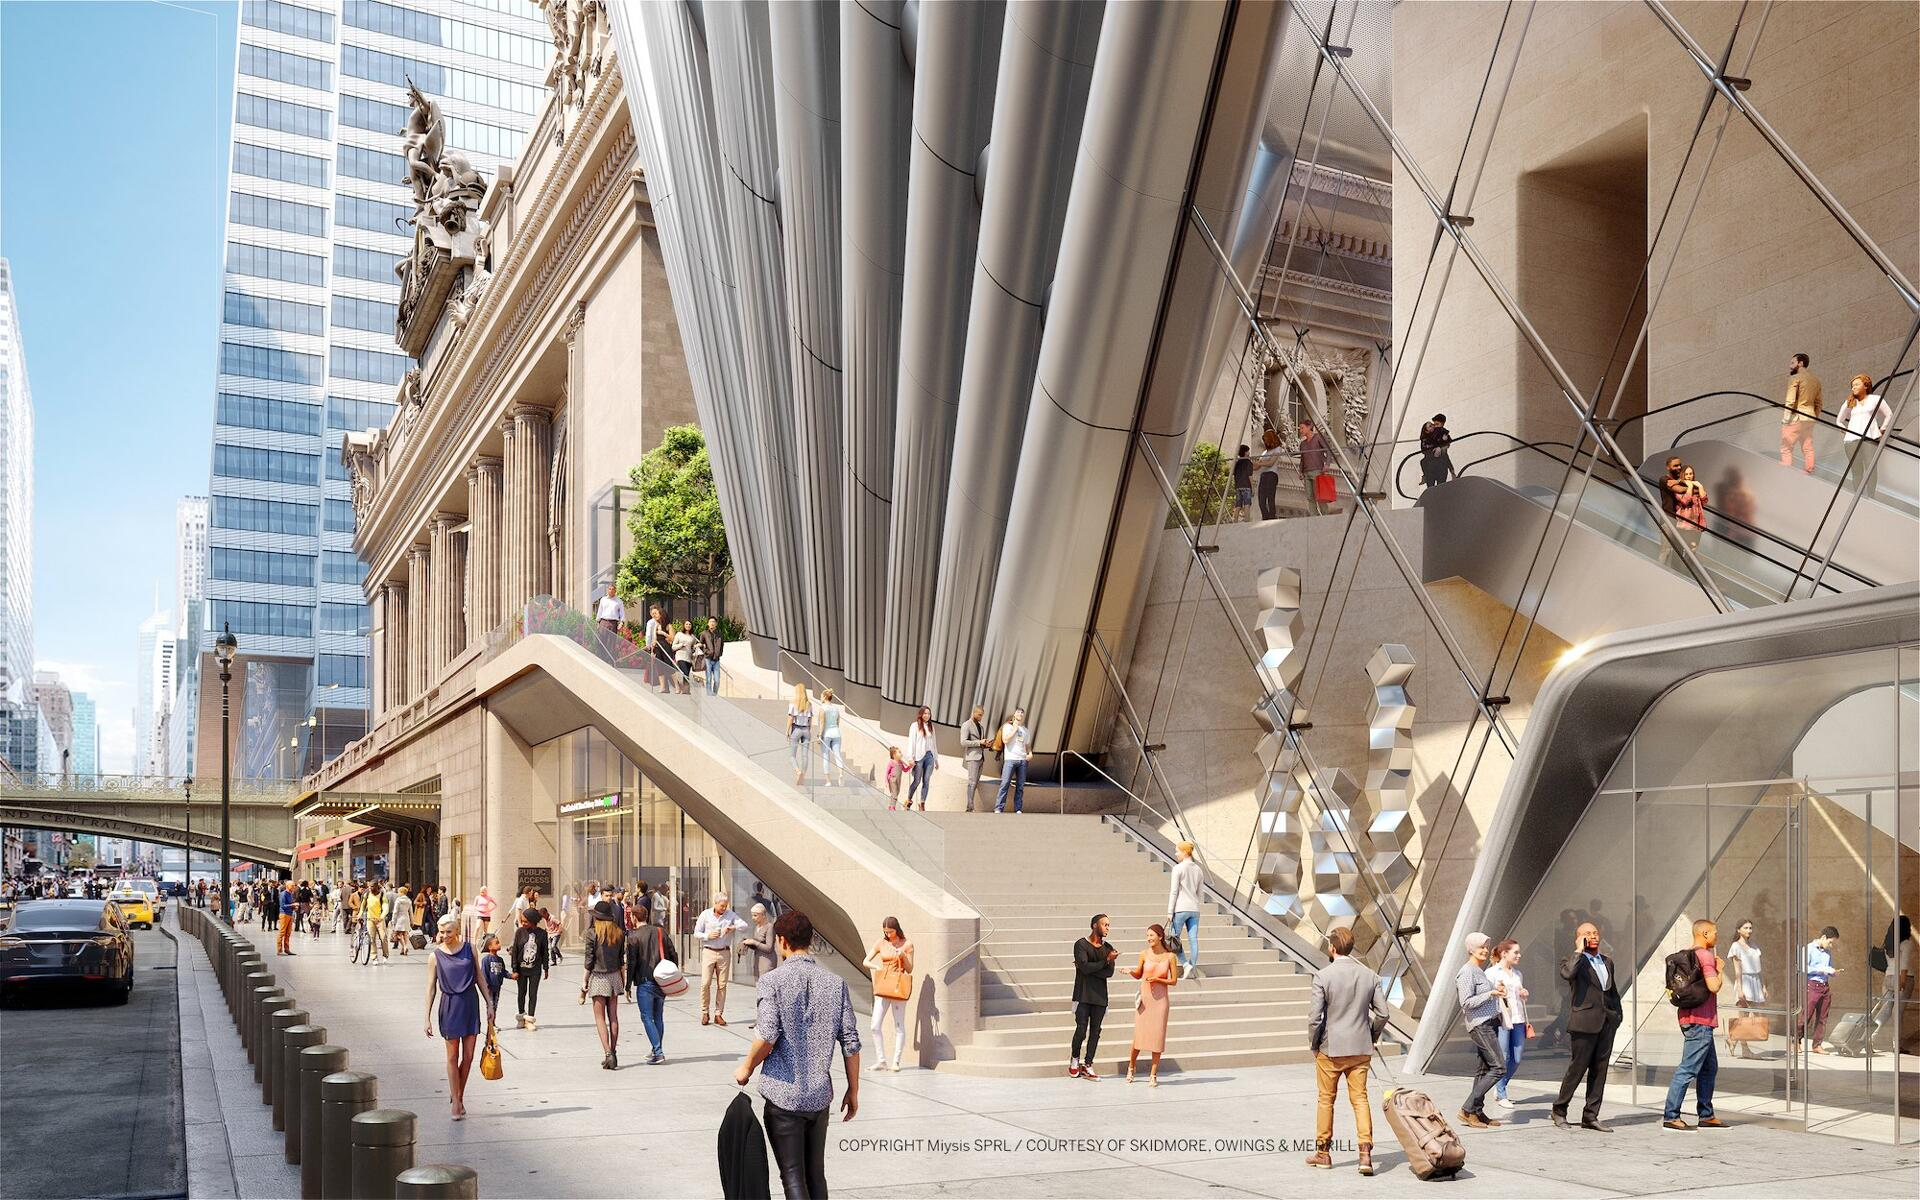

In [17]:
url = 'https://cdn.tfc.com/marketing/files/journal/SOM-175-Park-Avenue-42nd-Street-Looking-West.jpg'
Image(url, width=600, height=600)

### Retail
* At its core, retail is a **distribution mechanism**. 
    * Moving physical goods from producers to final consumers
    * Process evolving for centuries
    * Economies of scope and scale to reduce **costs of distribution**
    * Economic efficiencies that **benefit consumers**

* Not surprising that **tech** and **retail** combined to create **Amazon**.

### Retail: Evolution 
* General stores of the Old West
* Catalogs
* Department stores
* Malls
* Amazon

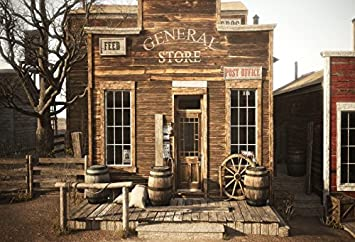

In [18]:
url ='https://m.media-amazon.com/images/I/511a7Bo9qqL._AC_SX355_.jpg'
Image(url, width=600, height=600)

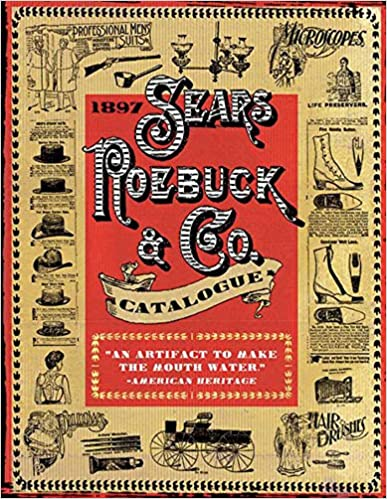

In [19]:
url ='https://images-na.ssl-images-amazon.com/images/I/61QF1lbbNEL._SX385_BO1,204,203,200_.jpg'
Image(url, width=400, height=400)

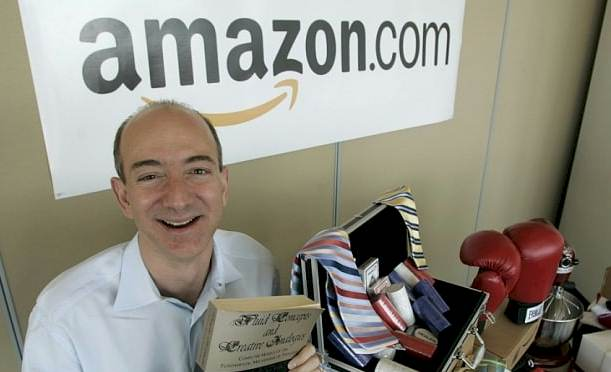

In [20]:
url = 'https://blog.logomyway.com/wp-content/uploads/2017/02/Jeff-Bezos-amazon.jpg'
Image(url, width=600, height=600)

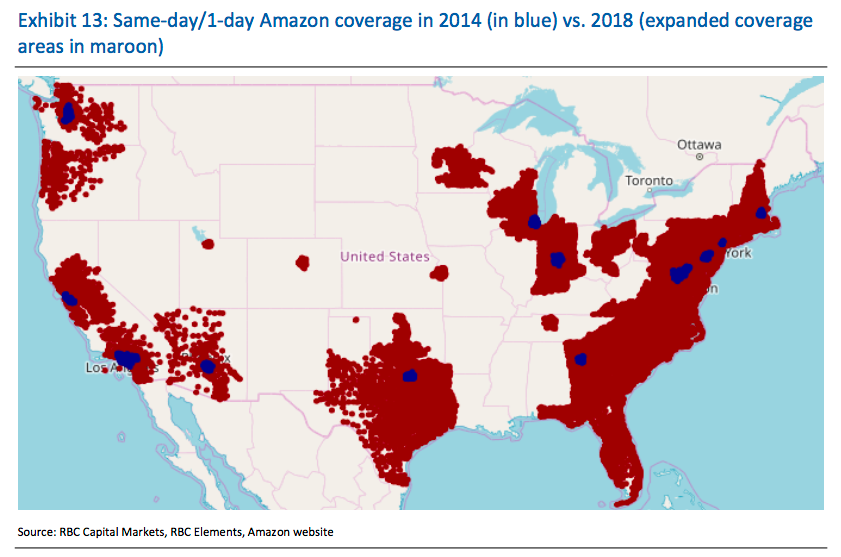

In [21]:
url = 'https://fm-static.cnbc.com/awsmedia/chart/2019/4/5/ScreenShot2019-05-02at112520AM.1557083188138.png'
Image(url, width=700, height=700)

### Retail: Risk and Return

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Amazon ($/Share)')

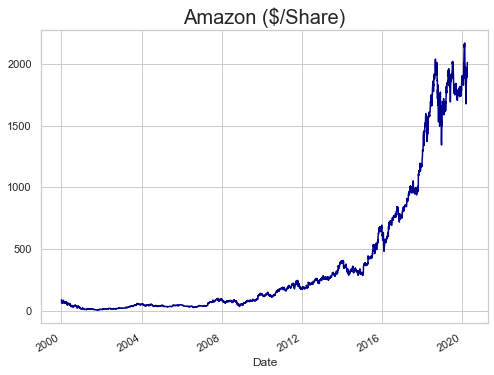

In [22]:
start, end = "2000-01-01", "2020-04-08"
amzn = yf.download('AMZN', start=start, end=end)
amzn = amzn['Adj Close']
plt.figure(figsize=(8, 6))
amzn.plot(color='darkblue')
plt.title('Amazon ($/Share)', fontsize=20)


In [23]:
amzn_returns = (np.log(amzn / amzn.shift(1))).dropna()
amzn_vol = np.sqrt(amzn_returns ** 2)

(0.0, 30.0)

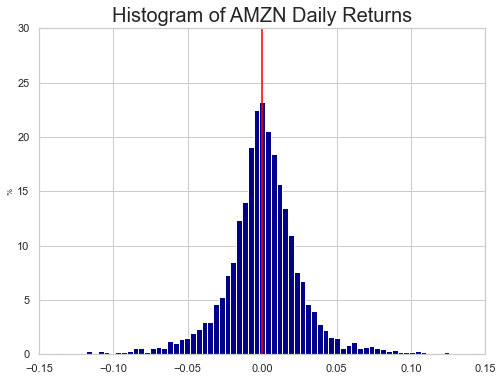

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(amzn_returns, bins=150, density=True, color='darkblue')
plt.title('Histogram of AMZN Daily Returns', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.15, 0.15)
plt.ylim(0, 30)

Text(0.5, 1.0, 'Amazon Volatility')

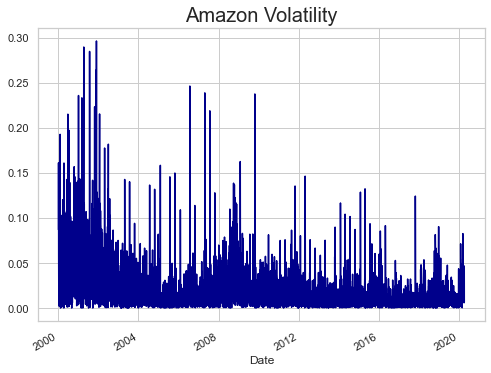

In [25]:
plt.figure(figsize=(8, 6))
amzn_vol.plot(color='darkblue')
plt.title('Amazon Volatility', fontsize=20)





## Week 4: How Is PropTech Disrupting CRE?
* **PropTech** is a new entry to the lexicon.



* The idea of using data, analytics and technology **is not a new idea in CRE**.

* The relevance of location$^3$.
    * Like any asset class, real estate faces a return-risk trade-off.
    * Real estate, however, faces risks not faced by bonds or equities: **it is fixed in location**.
    * In addition, real estate capital markets are **less liquid** than bonds or equities.  


    
* Since the Great Depression, attracting liquidity to real estate has been stated U.S. government policy.
    * **Residential**: GSEs and mortgaged-backed securities.
    * **Commercial**: REITs and mortgaged-backed securities.

* The role of liquidity is **to foster informationally efficiency**.

* In modern finance, data **accuracy and timeliness** enhance informational efficiency.



* Achieving accuracy and timeliness can be a challenge when **ownership is fragmented** and **transactions are private**.



* CRE has been **slowly** addressing this issue.

* A Brief History of Time (Early Days and Roughly Chronological)
    * Brokerages
    * [National Counsel of Real Estate Investment Fiduciaries (NCREIF)](https://www.ncreif.org/)
    * Institutional and private equity funds
    * [CBRE Econometric Advisors](https://www.cbre-ea.com/)
    * [Real Capital Analytics](https://www.rcanalytics.com/)
    * [CoStar](https://www.costar.com/)    

* Early days were about fundamentals.
    * Measuring profitability at an asset level.
    * Transactional cap rate information.
    * Historical rent and vacancy data.
    * Rudimentary forecasting based on subjective belief.



* Now venture capital is funding a large number of PropTech start-ups.
    * Focus to date appears to be successful application in non-CRE applications.

* This role of this week's panel:
    * To provide context of past and present for perspective on the future.

## Week 5: Has COVID-19 Permanently Altered the Landscape for CRE?

 * Space use and its re-development and re-purposing before COVID-19.
     * Skanska's re-development of [Moynihan Train Hall](https://www.usa.skanska.com/who-we-are/media/press-releases/249808/Skanska-Completes-Transformation-of-the-James-A.-Farley-Building-into-New-York-Citys-New-Moynihan-Train-Hall) in NYC
     * CBRE's [Workplace360](https://www.youtube.com/watch?v=k6yyjaXP8Fo)

## Week 5: Has COVID-19 Permanently Altered the Landscape for CRE?

 * Dangers of making decisions based on singular events.
     * 9/11/2001: The end of the skyscrapper
     * GFC: The end of exotic financial instruments
     * COVID-19: The end of the office and permanent WFH

## Week 5: Has COVID-19 Permanently Altered the Landscape for CRE?

* The deployment of capital in CRE.
* Interest rates and cap rates.

## Week 6: How Is Tech Distrupting Asset Development and Management?
* Recall that total returns are a sum of:
    * Gain or loss (change in nominal price).
    * Yield (dividend or rent as a share of total value).
    
    
* Consider other asset classes and financial management.
    * Note that CRE can look like either a bond or an equity.

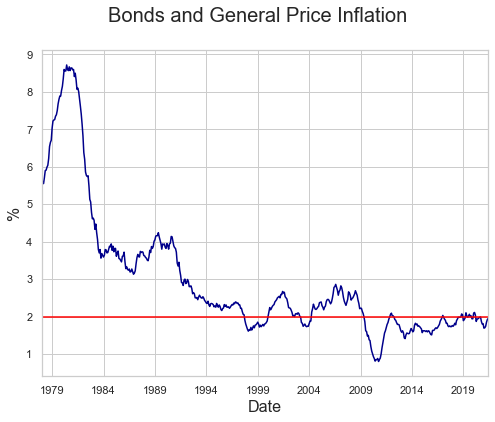

In [26]:
inflation = fred.get_series("PCETRIM12M159SFRBDAL")
inflation.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Bonds and General Price Inflation', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="red")


In [27]:
wilshire = fred.get_series("WILL5000PR")
wilshire_returns = (np.log(wilshire / wilshire.shift(1))).dropna()
whilshire_vol = np.sqrt(wilshire_returns ** 2)
wilshire_returns.mean() * 100

0.03629746610718479

Text(0.5, 1.0, '~ 0.036%')

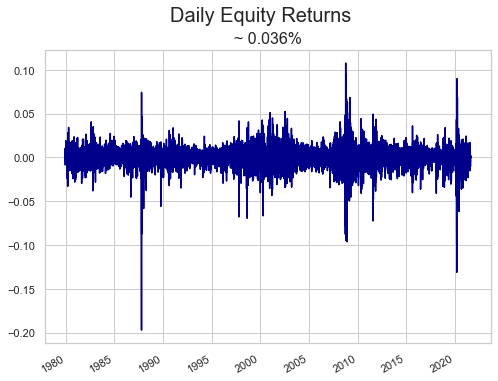

In [28]:
plt.figure(figsize=(8, 6))
wilshire_returns.plot(color='darkblue')
plt.suptitle('Daily Equity Returns', fontsize=20)
plt.title('~ 0.036%', fontsize=16)




Text(0.5, 0.98, 'Equity Volatility')

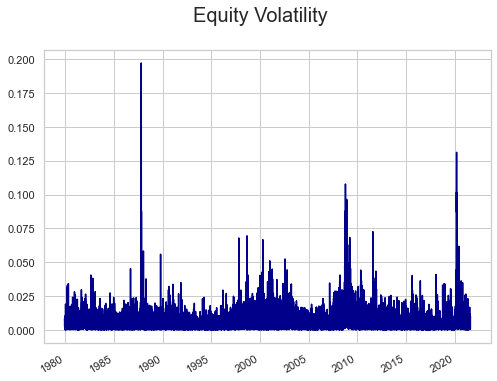

In [29]:
plt.figure(figsize=(8, 6))
whilshire_vol.plot(color='darkblue')
plt.suptitle('Equity Volatility', fontsize=20)



